In [1]:
### from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [2]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [3]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [4]:
# %%javascript
# var nb = IPython.notebook;
# var kernel = IPython.notebook.kernel;
# var command = "NOTEBOOK_NAME = '" + nb.base_url + nb.notebook_path + "'";
# kernel.execute(command);

In [5]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'decoding_across_combined_1sec_time_bin_dhpc_w35and36_gmin'

In [6]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [7]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [8]:
all_animals = 'dhpcg1','dhpc24',  'dhpcg20','dhpc35','dhpc36'
expo_animals = 'dhpcg1','dhpc24', 'dhpcg20','dhpc35','dhpc36'
pre_animals = 'dhpcg1','dhpc24'            ,'dhpc35','dhpc36'
post_animals = 'dhpcg1','dhpc24', 'dhpcg20','dhpc35','dhpc36'
renew_animals =         'dhpc24','dhpcg20','dhpc35','dhpc36'
ext2_animals = 'dhpcg1','dhpc24', 'dhpcg20','dhpc35','dhpc36'
ext1_animals = 'dhpcg1','dhpc24', 'dhpcg20','dhpc35','dhpc36'

In [9]:
#find animals common to both sessions
expopre_animals = np.intersect1d(expo_animals, pre_animals)
expopost_animals = np.intersect1d(expo_animals, post_animals)
prepost_animals = np.intersect1d(pre_animals, post_animals)
preext1_animals = np.intersect1d(pre_animals, ext1_animals)
preext2_animals = np.intersect1d(pre_animals, ext2_animals)
prerenew_animals = np.intersect1d(pre_animals, renew_animals)
postext1_animals = np.intersect1d(post_animals, ext1_animals)
postext2_animals = np.intersect1d(post_animals, ext2_animals)
postrenew_animals = np.intersect1d(post_animals, renew_animals)
ext1ext2_animals = np.intersect1d(ext1_animals, ext2_animals)
ext1renew_animals = np.intersect1d(ext1_animals, renew_animals)
ext2renew_animals = np.intersect1d(ext2_animals, renew_animals)

In [10]:
sessions = 'expo', 'pre', 'post', 'ext1', 'ext2', 'renew'

In [11]:
for sess in 'pre', 'post', 'ext1', 'ext2', 'renew':

    exec("patterns_tb_%s = dict(zip(%s_animals, [ut.load_variable('patterns_tb',\
                                                           '../%%s/%s/notebooks/autorestore/decoding_around_onset/'%%ani)\
                                                  for ani in %s_animals]))"%(sess, sess, sess, sess))
    exec("labels_%s = dict(zip(%s_animals, [ut.load_variable('labels',\
                                                         '../%%s/%s/notebooks/autorestore/decoding_around_onset/'%%ani)\
                                                  for ani in %s_animals]))"%(sess, sess, sess, sess))

In [12]:
#have to extract 2_odor_expo varibles differently from that used above
patterns_tb_expo = dict(zip(expo_animals,
                                [ut.load_variable('patterns_tb','../%s/2_odor_expo/notebooks/autorestore/decoding_around_onset'%ani)
                                                  for ani in expo_animals]))

labels_expo = dict(zip(expo_animals,
                                [ut.load_variable('labels','../%s/2_odor_expo/notebooks/autorestore/decoding_around_onset'%ani)
                                                  for ani in expo_animals]))

In [13]:
delta_t0 = 1

t_start0 = -5  # sec
t_stop0 = 11  # sec

In [14]:
#get patterns of CellReg'd cells
#expopre_patterns_expo_first30 = load_all_animals_vars('patterns_evs_expopre', expopre_animals, '', notebook='decoding_expoVSpre_30trials')          
#expopre_patterns_pre_first30 = load_all_animals_vars('patterns_evs_pre_first30', expopre_animals, '', notebook='decoding_expoVSpre_30trials')                                            
#expopre_labels_expo_first30 = load_all_animals_vars('labels_expo',expopre_animals, '', notebook='decoding_expoVSpre_30trials')
#expopre_labels_pre_first30 = load_all_animals_vars('labels_pre_first30',expopre_animals, '', notebook='decoding_expoVSpre_30trials')
prepost_patterns_pre = load_all_animals_vars('patterns_evs_1s_pre_post', prepost_animals, '', notebook='patterns_time_bins')             
prepost_patterns_post = load_all_animals_vars('patterns_evs_1s_post_pre', prepost_animals, '', notebook='patterns_time_bins')
prepost_labels_pre = load_all_animals_vars('labels_pre',prepost_animals, '', notebook='patterns_time_bins')
prepost_labels_post = load_all_animals_vars('labels_post',prepost_animals, '', notebook='patterns_time_bins')
preext1_patterns_pre = load_all_animals_vars('patterns_evs_1s_pre_ext1', preext1_animals, '', notebook='patterns_time_bins')             
preext1_patterns_ext1 = load_all_animals_vars('patterns_evs_1s_ext1_pre', preext1_animals, '', notebook='patterns_time_bins')
preext1_labels_pre = load_all_animals_vars('labels_pre',preext1_animals, '', notebook='patterns_time_bins')
preext1_labels_ext1 = load_all_animals_vars('labels_ext1',preext1_animals, '', notebook='patterns_time_bins')
preext2_patterns_pre = load_all_animals_vars('patterns_evs_1s_pre_ext2', preext2_animals, '', notebook='patterns_time_bins')             
preext2_patterns_ext2 = load_all_animals_vars('patterns_evs_1s_ext2_pre', preext2_animals, '', notebook='patterns_time_bins')
preext2_labels_pre = load_all_animals_vars('labels_pre',preext2_animals, '', notebook='patterns_time_bins')
preext2_labels_ext2 = load_all_animals_vars('labels_ext2',preext2_animals, '', notebook='patterns_time_bins')
prerenew_patterns_pre = load_all_animals_vars('patterns_evs_1s_pre_renew', prerenew_animals, '', notebook='patterns_time_bins')             
prerenew_patterns_renew = load_all_animals_vars('patterns_evs_1s_renew_pre', prerenew_animals, '', notebook='patterns_time_bins')
prerenew_labels_pre = load_all_animals_vars('labels_pre',prerenew_animals, '', notebook='patterns_time_bins')
prerenew_labels_renew = load_all_animals_vars('labels_renew',prerenew_animals, '', notebook='patterns_time_bins')
postext1_patterns_post = load_all_animals_vars('patterns_evs_1s_post_ext1',postext1_animals, '', notebook='patterns_time_bins')
postext1_patterns_ext1 = load_all_animals_vars('patterns_evs_1s_ext1_post',postext1_animals, '', notebook='patterns_time_bins')
postext1_labels_post = load_all_animals_vars('labels_post',postext1_animals, '', notebook='patterns_time_bins')
postext1_labels_ext1 = load_all_animals_vars('labels_ext1',postext1_animals, '', notebook='patterns_time_bins')
postext2_patterns_post = load_all_animals_vars('patterns_evs_1s_post_ext2',postext2_animals, '', notebook='patterns_time_bins')
postext2_patterns_ext2 = load_all_animals_vars('patterns_evs_1s_ext2_post',postext2_animals, '', notebook='patterns_time_bins')
postext2_labels_post = load_all_animals_vars('labels_post',postext2_animals, '', notebook='patterns_time_bins')
postext2_labels_ext2 = load_all_animals_vars('labels_ext2',postext2_animals, '', notebook='patterns_time_bins')
postrenew_patterns_post = load_all_animals_vars('patterns_evs_1s_post_renew',postrenew_animals, '', notebook='patterns_time_bins')
postrenew_patterns_renew = load_all_animals_vars('patterns_evs_1s_renew_post',postrenew_animals, '', notebook='patterns_time_bins')
postrenew_labels_post = load_all_animals_vars('labels_post',postrenew_animals, '', notebook='patterns_time_bins')
postrenew_labels_renew = load_all_animals_vars('labels_renew',postrenew_animals, '', notebook='patterns_time_bins')
ext1ext2_patterns_ext1 = load_all_animals_vars('patterns_evs_1s_ext1_ext2', ext1ext2_animals, '', notebook='patterns_time_bins')             
ext1ext2_patterns_ext2 = load_all_animals_vars('patterns_evs_1s_ext2_ext1', ext1ext2_animals, '', notebook='patterns_time_bins')
ext1ext2_labels_ext1 = load_all_animals_vars('labels_ext1',ext1ext2_animals, '', notebook='patterns_time_bins')
ext1ext2_labels_ext2 = load_all_animals_vars('labels_ext2',ext1ext2_animals, '', notebook='patterns_time_bins')
ext1renew_patterns_ext1 = load_all_animals_vars('patterns_evs_1s_ext1_renew', ext1renew_animals, '', notebook='patterns_time_bins')             
ext1renew_patterns_renew = load_all_animals_vars('patterns_evs_1s_renew_ext1', ext1renew_animals, '', notebook='patterns_time_bins')
ext1renew_labels_ext1 = load_all_animals_vars('labels_ext1',ext1renew_animals, '', notebook='patterns_time_bins')
ext1renew_labels_renew = load_all_animals_vars('labels_renew',ext1renew_animals, '', notebook='patterns_time_bins')
ext2renew_patterns_renew = load_all_animals_vars('patterns_evs_1s_renew_ext2',ext2renew_animals, '', notebook='patterns_time_bins')
ext2renew_patterns_ext2 = load_all_animals_vars('patterns_evs_1s_ext2_renew',ext2renew_animals, '', notebook='patterns_time_bins')
ext2renew_labels_renew = load_all_animals_vars('labels_renew',ext2renew_animals, '', notebook='patterns_time_bins')
ext2renew_labels_ext2 = load_all_animals_vars('labels_ext2',ext2renew_animals, '', notebook='patterns_time_bins')


In [15]:
all_comparisons = 'prepost_patterns_pre',\
'prepost_patterns_post',\
'preext1_patterns_pre',\
'preext1_patterns_ext1',\
'preext2_patterns_pre',\
'preext2_patterns_ext2',\
'prerenew_patterns_pre',\
'prerenew_patterns_renew',\
'postext1_patterns_post',\
'postext1_patterns_ext1',\
'postext2_patterns_post',\
'postext2_patterns_ext2',\
'postrenew_patterns_post',\
'postrenew_patterns_renew',\
'ext1ext2_patterns_ext1',\
'ext1ext2_patterns_ext2',\
'ext1renew_patterns_ext1',\
'ext1renew_patterns_renew',\
'ext2renew_patterns_renew',\
'ext2renew_patterns_ext2'

In [16]:
#ani_comparisons = 'expopre','expopost','prepost','preext1','preext2','prerenew','postext1','postext2','postrenew','ext1ext2','ext1renew','ext2renew'
for comp in all_comparisons:
    for t in range(len(patterns_tb_pre['dhpc24'])):
        exec("%s_tb_%s = {}"%(comp,t))
        for ani in eval('%s_animals'%comp.split('_')[0]):
            try:
                print comp.split('_')[0],
                print ani,
                print t,
                exec("%s_tb_%s['%s'] = %s['%s'][%s]"%(comp,t,ani,comp,ani,t))
            except IOError as error:
                print 'ERROR'
            continue

prepost dhpc24 0 prepost dhpc35 0 prepost dhpc36 0 prepost dhpcg1 0 prepost dhpc24 1 prepost dhpc35 1 prepost dhpc36 1 prepost dhpcg1 1 prepost dhpc24 2 prepost dhpc35 2 prepost dhpc36 2 prepost dhpcg1 2 prepost dhpc24 3 prepost dhpc35 3 prepost dhpc36 3 prepost dhpcg1 3 prepost dhpc24 4 prepost dhpc35 4 prepost dhpc36 4 prepost dhpcg1 4 prepost dhpc24 5 prepost dhpc35 5 prepost dhpc36 5 prepost dhpcg1 5 prepost dhpc24 6 prepost dhpc35 6 prepost dhpc36 6 prepost dhpcg1 6 prepost dhpc24 7 prepost dhpc35 7 prepost dhpc36 7 prepost dhpcg1 7 prepost dhpc24 8 prepost dhpc35 8 prepost dhpc36 8 prepost dhpcg1 8 prepost dhpc24 9 prepost dhpc35 9 prepost dhpc36 9 prepost dhpcg1 9 prepost dhpc24 10 prepost dhpc35 10 prepost dhpc36 10 prepost dhpcg1 10 prepost dhpc24 11 prepost dhpc35 11 prepost dhpc36 11 prepost dhpcg1 11 prepost dhpc24 12 prepost dhpc35 12 prepost dhpc36 12 prepost dhpcg1 12 prepost dhpc24 13 prepost dhpc35 13 prepost dhpc36 13 prepost dhpcg1 13 prepost dhpc24 14 prepost dhpc35

# set whether you want to use all cells, downsample to min cells for each compared session, or dowsample to global minimum of cells across all comparisons

In [17]:
#set downsampling parameter to:
#max_cells = all cells
#intraregion_min = downsample to the comparison with fewest cells within the same hippo region
#interregion_min = downsample to the comparison with fewest cells, considering both hippo regions
#gmin = the global minimum (pretty much corresponds to interregion_min)

downsample = 'gmin'

In [18]:
if downsample == 'max_cells':
    n_cells = None #will use all registered cells
if downsample == 'intraregion_min':
    n_cells = ut.load_variable('n_cells_across_min_vhpc', '../notebooks/autorestore/n_cells/')
if downsample == 'interregion_min':
    n_cells = ut.load_variable('n_cells_across_min_overall', '../notebooks/autorestore/n_cells/')
if downsample == 'gmin':
    n_cells = ut.load_variable('n_cells_gmin', '../notebooks/autorestore/n_cells/')
if downsample == 200:
    n_cells = 200

In [19]:
n_cells

147

In [20]:
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.svm import SVC
decoder = SVC(kernel='linear', decision_function_shape='ovo')

def do_test_within(patterns, labels, n_cells=None):
#     which_train = range(90)
#     which_test = range(90)
#    cv =LeaveOneOut()
    
    which_train = {}
    which_test = {}
    for ani in patterns.keys():
        which_train_a = np.random.permutation(np.where(labels[ani]==0)[0])
        which_test_a = which_train_a[:len(which_train_a)/2]
        which_train_a = which_train_a[len(which_train_a)/2:]
        
        which_train_b = np.random.permutation(np.where(labels[ani]==1)[0])
        which_test_b = which_train_b[:len(which_train_b)/2]
        which_train_b = which_train_b[len(which_train_b)/2:]
        
        which_train[ani] = np.concatenate((which_train_a, which_train_b))
        which_test[ani] = np.concatenate((which_test_a, which_test_b))
    
    patterns_t = patterns.copy()
    labels_t = labels.copy()
    patterns_T = patterns.copy()
    labels_T = labels.copy()
    for ani in patterns.keys():
        patterns_t[ani] = patterns[ani][which_train[ani]]
        labels_t[ani] = labels[ani][which_train[ani]]
        patterns_T[ani] = patterns[ani][which_test[ani]]
        labels_T[ani] = labels[ani][which_test[ani]]
    patterns_comb_train, labels_comb = ut.combine_patterns(patterns_t, labels_t)
    patterns_comb_test, labels_comb = ut.combine_patterns(patterns_T, labels_T)
    
    if n_cells is None:
        cells = list(range(patterns_comb_train.shape[1]))
    elif n_cells > patterns_comb_train.shape[1]:
        cells = list(range(patterns_comb_train.shape[1]))
        print len(cells),
    else:
        cells = np.random.choice(range(patterns_comb_train.shape[1]), size=n_cells, replace=False)
        
    decoder.fit(patterns_comb_train[:, cells], labels_comb)
    scores = decoder.score(patterns_comb_test[:, cells], labels_comb)
    decoder.fit(patterns_comb_test[:, cells], labels_comb)
    return np.append(scores, decoder.score(patterns_comb_train[:, cells], labels_comb))

In [21]:
from sklearn.svm import SVC
decoder = SVC(kernel='linear', decision_function_shape='ovo')

def do_test_cross(patterns_t, labels_t, patterns_T, labels_T, n_cells=None):
#     which_train = range(90)
#     which_test = range(90)

    patterns_comb_train, labels_comb = ut.combine_patterns(patterns_t, labels_t)
    patterns_comb_test, labels_comb = ut.combine_patterns(patterns_T, labels_T)
    if n_cells is None:
        cells = list(range(patterns_comb_train.shape[1]))
        print len(cells),
    elif n_cells > patterns_comb_train.shape[1]:
        cells = list(range(patterns_comb_train.shape[1]))
        print len(cells),
    else:
        cells = np.random.choice(range(patterns_comb_train.shape[1]), size=n_cells, replace=False)
        #print cells.shape,
    decoder.fit(patterns_comb_train[:, cells], labels_comb)
    scores = decoder.score(patterns_comb_test[:, cells], labels_comb)
    decoder.fit(patterns_comb_test[:, cells], labels_comb)
    return np.append(scores, decoder.score(patterns_comb_train[:, cells], labels_comb))

%%time
#test across (and within) time bins within a session
#need to overwrite within tb comparisons later, because here it uses same data to train & test
n_loops=30
for comp in all_comparisons:
    for t in range (16):
        for c in range (16):
            exec('scores_%s_%s_tb%s_VS_%s_%s_tb%s = {}'%(comp.split('_')[0],comp.split('_')[-1],t,comp.split('_')[0],comp.split('_')[-1],c))
            #print comp,t,c," ",
            exec('scores_%s_%s_tb%s_VS_%s_%s_tb%s = np.r_[[do_test_cross(%s_tb_%s,labels_%s,%s_tb_%s,labels_%s,n_cells=n_cells)\
            for r in range(n_loops)]]'%(comp.split('_')[0],comp.split('_')[-1],t,comp.split('_')[0],comp.split('_')[-1],c,
                                        comp,t,comp.split('_')[-1],comp,c,comp.split('_')[-1]))

%%time
#decode within time bin, using cell reg cells
#these data will eventually replace the within time bin data above when collating everything into one list
n_loops=30
for t in range (16):
#    for c in range (16):
        for comp in all_comparisons:
            exec('scores_win_%s_%s_tb%s_VS_%s_%s_tb%s = []'%(comp.split('_')[0],comp.split('_')[-1],t,comp.split('_')[0],comp.split('_')[-1],t))
            #print comp,t," ",
            exec('scores_win_%s_%s_tb%s_VS_%s_%s_tb%s = np.r_[[do_test_within(%s_tb_%s,labels_%s,n_cells=n_cells)\
            for i in range(n_loops)]]'%(comp.split('_')[0],comp.split('_')[-1],t,comp.split('_')[0],comp.split('_')[-1],t,
                                        comp,t,comp.split('_')[-1]))

%%time
#test across session pairs
n_loops=30
AC = all_comparisons
for i in range(0,len(AC),2):
    for t in range (16):
        for c in range (16):
            exec('scores_%s_%s_tb%s_VS_%s_%s_tb%s = {}'%(AC[i].split('_')[0],AC[i].split('_')[-1],t,AC[i+1].split('_')[0],AC[i+1].split('_')[-1],c))
            #print AC[i],t,c," ",
            exec('scores_%s_%s_tb%s_VS_%s_%s_tb%s = np.r_[[do_test_cross(%s_tb_%s,labels_%s,%s_tb_%s,labels_%s,n_cells=n_cells)\
            for r in range(n_loops)]]'%(AC[i].split('_')[0],AC[i].split('_')[-1],t,AC[i+1].split('_')[0],AC[i+1].split('_')[-1],c,
                                        AC[i],t,AC[i].split('_')[-1],AC[i+1],c,AC[i+1].split('_')[-1]))

#%%time
##test across session pairs, but now reversing which session of pair is train and test
#############this should be unnecessary, as train and test data are reciporocally assigned above#####################
#n_loops=30
#AC = all_comparisons
#for i in range(1,len(AC),2):
#    for t in range (16):
#        for c in range (16):
#            exec('scores_%s_%s_tb%s_VS_%s_%s_tb%s = {}'%(AC[i].split('_')[0],AC[i].split('_')[-1],t,AC[i-1].split('_')[0],AC[i-1].split('_')[-1],c))
#            print AC[i],t,c," ",
#            exec('scores_%s_%s_tb%s_VS_%s_%s_tb%s = np.r_[[do_test_cross(%s_tb_%s,labels_%s,%s_tb_%s,labels_%s,n_cells=n_cells)\
#            for r in range(n_loops)]]'%(AC[i].split('_')[0],AC[i].split('_')[-1],t,AC[i-1].split('_')[0],AC[i-1].split('_')[-1],c,
#                                        AC[i],t,AC[i].split('_')[-1],AC[i-1],c,AC[i-1].split('_')[-1]))

for t in range (16):
    exec('testy%s = {}'%t)
    
for i in range(0,len(AC),2):
    for t in range (16):
        exec("testy%s['%s_%s_%s'] = []"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],AC[i+1].split('_')[-1]))
        for c in range (16):
            #print t, eval("testy%s['%s_%s_%s']"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],AC[i+1].split('_')[-1]))
            eval("testy%s['%s_%s_%s']"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],AC[i+1].split('_')[-1])).insert(c,(eval('scores_%s_%s_tb%s_VS_%s_%s_tb%s'%(AC[i].split('_')[0],
                            AC[i].split('_')[-1],t,AC[i+1].split('_')[0],AC[i+1].split('_')[-1],c))))

#for i in range(1,len(AC),2):
#    for t in range (16):
#        exec("testy%s['%s_%s_%s'] = []"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],AC[i-1].split('_')[-1]))
#        for c in range (16):
#            print t, eval("testy%s['%s_%s_%s']"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],AC[i-1].split('_')[-1]))
#            eval("testy%s['%s_%s_%s']"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],AC[i-1].split('_')[-1])).insert(c,(eval('scores_%s_%s_tb%s_VS_%s_%s_tb%s'%(AC[i].split('_')[0],
#                            AC[i].split('_')[-1],t,AC[i-1].split('_')[0],AC[i-1].split('_')[-1],c)).mean(1)).mean())
            
for comp in all_comparisons:
    for t in range (16):
        exec("testy%s['%s_%s_%s'] = []"%(t,comp.split('_')[0],comp.split('_')[-1],comp.split('_')[-1]))
        for c in range (16):
            #print t, eval("testy%s['%s_%s_%s']"%(t,comp.split('_')[0],comp.split('_')[-1],comp.split('_')[-1]))
            eval("testy%s['%s_%s_%s']"%(t,comp.split('_')[0],comp.split('_')[-1],comp.split('_')[-1])).insert(c,(eval('scores_%s_%s_tb%s_VS_%s_%s_tb%s'%(comp.split('_')[0],
                            comp.split('_')[-1],t,comp.split('_')[0],comp.split('_')[-1],c))))

#and now replace within-session score from above with score where test and train data are taken from different bins
for comp in all_comparisons:
    for t in range (16):
        eval("testy%s['%s_%s_%s']"%(t,comp.split('_')[0],comp.split('_')[-1],
                                    comp.split('_')[-1]))[t] = eval('scores_win_%s_%s_tb%s_VS_%s_%s_tb%s'%(comp.split('_')[0],
                                    comp.split('_')[-1],t,comp.split('_')[0],comp.split('_')[-1],t))

testy={}
for i in testy0:
    testy[i]=[]
    for r in range(len(testy0[i])):
        testy[i].append(eval("testy%s"%r)[i])
    np.array([testy[i]])

fig, ax = pl.subplots(len(testy),1, figsize=(2, 25))

for i,t in zip(range(len(testy)),testy):
    for r in range(16):
        ax[i].plot(r-5, np.mean(testy[t][r][r])*100, 'o', color='k', ls='-',lw=.5, zorder=19 ,ms=1)
        m = np.mean(testy[t][r][r])*100
        s = np.std(testy[t][r][r])*100
        ax[i].errorbar(r-5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
        ax[i].set_ylim(0, 100)
        ax[i].set_xlim(-4.5, 11)
        ax[i].set_xticks(np.arange(-4,11, 2))
        ax[i].set_xticklabels(np.arange(-4,11, 2))
        ax[i].hlines(50, -4,11, color='k', lw=1, linestyles='dotted')
        ax[i].set_ylabel('Perf % +/-SD')
        pt.plot_period_bar(ax[i], 25, start_end=(0, 2), color='r', delta_y=3)
        # pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
        pt.plot_period_bar(ax[i], 25, start_end=(4, 4.2), color='b', delta_y=3)
        ax[i].hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
        ax[i].set_title(t)
ax[i].set_xlabel('Time from odor onset (s)')


fig.tight_layout(pad=2)

#fig.savefig('../img/%s_gmin.jpg'%NOTEBOOK_NAME)

#across session only
fig, ax = pl.subplots(10,1, figsize=(2, 15))
across=[]
for x in [2,7,12,13,18,20,23,27,28,29]:
    across.append(testy.keys()[x])
for i,t in zip(range(len(across)),across):
    for r in range(16):
        ax[i].plot(r-5, np.mean(testy[t][r][r])*100, 'o', color='k', ls='-',lw=.5, zorder=19 ,ms=1)
        m = np.mean(testy[t][r][r])*100
        s = np.std(testy[t][r][r])*100
        ax[i].errorbar(r-5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
        ax[i].set_ylim(0, 100)
        ax[i].set_xlim(-4.5, 11)
        ax[i].set_xticks(np.arange(-4,11, 2))
        ax[i].set_xticklabels(np.arange(-4,11, 2))
        ax[i].hlines(50, -4,11, color='k', lw=1, linestyles='dotted')
        ax[i].set_ylabel('Perf % +/-SD')
        pt.plot_period_bar(ax[i], 25, start_end=(0, 2), color='r', delta_y=3)
        # pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
        pt.plot_period_bar(ax[i], 25, start_end=(4, 4.2), color='b', delta_y=3)
        ax[i].hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
        ax[i].set_title((t.split("_")[-2])+" VS "+(t.split("_")[-1]))
ax[i].set_xlabel('Time from odor onset (s)')


fig.tight_layout(pad=2)

fig.savefig('../img/%s_across_tb_matched.jpg'%NOTEBOOK_NAME)

for t in range (16):
    exec('testy_means%s = {}'%t)
    
for i in range(0,len(AC),2):
    for t in range (16):
        exec("testy_means%s['%s_%s_%s'] = []"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],AC[i+1].split('_')[-1]))
        for c in range (16):
            #print t, eval("testy_means%s['%s_%s_%s']"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],AC[i+1].split('_')[-1]))
            eval("testy_means%s['%s_%s_%s']"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],AC[i+1].split('_')[-1])).insert(c,(eval('scores_%s_%s_tb%s_VS_%s_%s_tb%s'%(AC[i].split('_')[0],
                            AC[i].split('_')[-1],t,AC[i+1].split('_')[0],AC[i+1].split('_')[-1],c)).mean(1)).mean())

for comp in all_comparisons:
    for t in range (16):
        exec("testy_means%s['%s_%s_%s'] = []"%(t,comp.split('_')[0],comp.split('_')[-1],comp.split('_')[-1]))
        for c in range (16):
            #print t, eval("testy_means%s['%s_%s_%s']"%(t,comp.split('_')[0],comp.split('_')[-1],comp.split('_')[-1]))
            eval("testy_means%s['%s_%s_%s']"%(t,comp.split('_')[0],comp.split('_')[-1],comp.split('_')[-1])).insert(c,(eval('scores_%s_%s_tb%s_VS_%s_%s_tb%s'%(comp.split('_')[0],
                            comp.split('_')[-1],t,comp.split('_')[0],comp.split('_')[-1],c)).mean(1)).mean())

#and now replace within-session score from above with score where test and train data are taken from different bins
for comp in all_comparisons:
    for t in range (16):
        eval("testy_means%s['%s_%s_%s']"%(t,comp.split('_')[0],comp.split('_')[-1],
                                    comp.split('_')[-1]))[t] = eval('scores_win_%s_%s_tb%s_VS_%s_%s_tb%s.mean(1).mean()'%(comp.split('_')[0],
                                    comp.split('_')[-1],t,comp.split('_')[0],comp.split('_')[-1],t))

testy_means={}
for i in testy_means0:
    testy_means[i]=[]
    for r in range(len(testy_means0[i])):
        testy_means[i].append(eval("testy_means%s"%r)[i])
    np.array([testy_means[i]])

fig, ax = pl.subplots(len(testy), 1, figsize=(3,60))#, sharex=True, sharey=True)
vmin=0.5
vmax=1
for i,t in zip(range(len(testy)),testy):
    im = ax[i].imshow(testy_means[t],origin='lower', interpolation='nearest',vmin=vmin, vmax=vmax)
    ax[i].set_title(t)
for x in range(len(testy)):
    ax[x].set_xticks(range(16))
    ax[x].set_yticks(range(16))
    ax[x].set_ylim(2.5, 14.5)
    ax[x].set_xlim(2.5,14.5)
    ax[x].set_xticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','0\nCS','1\nCS','2\nTr','3\nTr','4\nRw','5', '6','7','8','9','10'],fontsize=4)
    ax[x].set_yticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','CS 0','CS 1','Tr 2','Tr 3','Rw 4','5', '6','7','8','9','10'],fontsize=4)
    ax[x].set_ylabel('Time(s) from CS onset', fontsize=5)
    ax[x].set_xlabel('Time(s) from CS onset', fontsize=5)
    
# axs[0].set_xticklabels(np.arange(len(np.unique(labels)))+1)
# axs[0].set_yticklabels(np.arange(len(np.unique(labels)))+1)


cax = fig.add_axes([.85, 0.86, 0.05, 0.05])
fig.colorbar(im, cax=cax)
fig.tight_layout(pad=2.5)
#fig.savefig('../img/%s.jpg'%NOTEBOOK_NAME)

# now, use distinct trials for train and test for decoding across time bins

In [22]:
#trying to use different trials for different time bins
from sklearn.svm import SVC
decoder = SVC(kernel='linear', decision_function_shape='ovo')

def do_test_cross_distinct(patterns_t, labels_t, patterns_T, labels_T, n_cells=None):
    which_train = {}
    which_test = {}
    for ani in patterns_t.keys():
        which_train_a = np.random.permutation(np.where(labels_t[ani]==0)[0])
        which_test_a = which_train_a[:len(which_train_a)/2]
        which_train_a = which_train_a[len(which_train_a)/2:]
        
        which_train_b = np.random.permutation(np.where(labels_t[ani]==1)[0])
        which_test_b = which_train_b[:len(which_train_b)/2]
        which_train_b = which_train_b[len(which_train_b)/2:]
        
        which_train[ani] = np.concatenate((which_train_a, which_train_b))
        which_test[ani] = np.concatenate((which_test_a, which_test_b))
    patterns_dt = patterns_t.copy()
    labels_dt = labels_t.copy()
    patterns_dT = patterns_T.copy()
    labels_dT = labels_T.copy()
    for ani in patterns_t.keys():
        patterns_dt[ani] = patterns_dt[ani][which_train[ani]]
        labels_dt[ani] = labels_dt[ani][which_train[ani]]
        patterns_dT[ani] = patterns_dT[ani][which_test[ani]]
        labels_dT[ani] = labels_dT[ani][which_test[ani]]      
        
    patterns_comb_train, labels_comb = ut.combine_patterns(patterns_dt, labels_dt)
    patterns_comb_test, labels_comb = ut.combine_patterns(patterns_dT, labels_dT)
    
    if n_cells is None:
        cells = list(range(patterns_comb_train.shape[1]))
        print len(cells),
    elif n_cells > patterns_comb_train.shape[1]:
        cells = list(range(patterns_comb_train.shape[1]))
        print len(cells),
    else:
        cells = np.random.choice(range(patterns_comb_train.shape[1]), size=n_cells, replace=False)
        #print cells.shape,
    
    decoder.fit(patterns_comb_train[:, cells], labels_comb)
    scores = decoder.score(patterns_comb_test[:, cells], labels_comb)
    decoder.fit(patterns_comb_test[:, cells], labels_comb)
    return np.append(scores, decoder.score(patterns_comb_train[:, cells], labels_comb))

In [23]:
%%time
#test across (and within) time bins within a session
#need to overwrite within tb comparisons later, because here it uses same data to train & test
n_loops=30
for comp in all_comparisons:
    for t in range (16):
        for c in range (16):
            exec('scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s = {}'%(comp.split('_')[0],comp.split('_')[-1],t,comp.split('_')[0],comp.split('_')[-1],c))
            #print comp,t,c," ",
            exec('scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s = np.r_[[do_test_cross_distinct(%s_tb_%s,labels_%s,%s_tb_%s,labels_%s,n_cells=n_cells)\
            for r in range(n_loops)]]'%(comp.split('_')[0],comp.split('_')[-1],t,comp.split('_')[0],comp.split('_')[-1],c,
                                        comp,t,comp.split('_')[-1],comp,c,comp.split('_')[-1]))

CPU times: user 1h 21min 12s, sys: 5.2 s, total: 1h 21min 17s
Wall time: 1h 21min 10s


In [24]:
%%time
#across sessions
n_loops=30
AC = all_comparisons
for i in range(0,len(AC),2):
    for t in range (16):
        for c in range (16):
            exec('scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s = {}'%(AC[i].split('_')[0],AC[i].split('_')[-1],t,AC[i+1].split('_')[0],AC[i+1].split('_')[-1],c))
            #print AC[i],t,c," ",
            exec('scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s = np.r_[[do_test_cross_distinct(%s_tb_%s,labels_%s,%s_tb_%s,labels_%s,n_cells=n_cells)\
            for r in range(n_loops)]]'%(AC[i].split('_')[0],AC[i].split('_')[-1],t,AC[i+1].split('_')[0],AC[i+1].split('_')[-1],c,
                                        AC[i],t,AC[i].split('_')[-1],AC[i+1],c,AC[i+1].split('_')[-1]))

CPU times: user 40min 30s, sys: 2.73 s, total: 40min 32s
Wall time: 40min 29s


In [25]:
for t in range (16):
    exec('distinct%s = {}'%t)
    
for i in range(0,len(AC),2):
    for t in range (16):
        exec("distinct%s['%s_%s_%s'] = []"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],AC[i+1].split('_')[-1]))
        for c in range (16):
            #print t, eval("distinct%s['%s_%s_%s']"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],AC[i+1].split('_')[-1]))
            eval("distinct%s['%s_%s_%s']"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],AC[i+1].split('_')[-1])).insert(c,(eval('scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s'%(AC[i].split('_')[0],
                            AC[i].split('_')[-1],t,AC[i+1].split('_')[0],AC[i+1].split('_')[-1],c))))
            
for comp in all_comparisons:
    for t in range (16):
        exec("distinct%s['%s_%s_%s'] = []"%(t,comp.split('_')[0],comp.split('_')[-1],comp.split('_')[-1]))
        for c in range (16):
            #print t, eval("distinct%s['%s_%s_%s']"%(t,comp.split('_')[0],comp.split('_')[-1],comp.split('_')[-1]))
            eval("distinct%s['%s_%s_%s']"%(t,comp.split('_')[0],comp.split('_')[-1],comp.split('_')[-1])).insert(c,(eval('scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s'%(comp.split('_')[0],
                            comp.split('_')[-1],t,comp.split('_')[0],comp.split('_')[-1],c))))

In [26]:
#get mean of each loop (not overall mean, which we will do below). TrainTest mean.
for t in range(16):
    exec("TrTe_mean_distinct%s = {}"%t)
    for i in eval("distinct%s"%t):
        exec("TrTe_mean_distinct%s[i] = [[] for x in range(len(distinct%s[i]))]"%(t,t)) #initialize list of lists with proper # of entries
        for r in range(len(eval("distinct%s[i]"%t))):
            exec("TrTe_mean_distinct%s[i][r].append([distinct%s[i][r][x].mean() for x in range(len(distinct%s[i][r]))])"%(t,t,t))
            exec("TrTe_mean_distinct%s[i][r] = TrTe_mean_distinct%s[i][r][0]"%(t,t)) # get rid of outer list encasing list

In [27]:
#perform ttest for each decoding epoch vs chance (.5)
for t in range(16):
    exec("distinct%s_ttest = {}"%t)
    for i in eval("TrTe_mean_distinct%s"%t):
        exec("distinct%s_ttest[i] = [[] for x in range(len(distinct%s[i]))]"%(t,t)) #initialize list of lists with proper # of entries
        for r in range(len(eval("TrTe_mean_distinct%s[i]"%t))):
            exec("distinct%s_ttest[i][r] = sstats.ttest_1samp(TrTe_mean_distinct%s[i][r][:15],.5)"%(t,t))
            exec("distinct%s_ttest[i][r] = distinct%s_ttest[i][r][-1]"%(t,t)) #only take p-values (discard t-statistic value)

In [28]:
#perform wilcoxon test (nonparametric) for each decoding epoch vs chance (.5)
for t in range(16):
    exec("distinct%s_wilcox = {}"%t)
    for i in eval("TrTe_mean_distinct%s"%t):
        exec("distinct%s_wilcox[i] = [[] for x in range(len(distinct%s[i]))]"%(t,t)) #initialize list of lists with proper # of entries
        for r in range(len(eval("TrTe_mean_distinct%s[i]"%t))):
            exec("subtracted = [x-0.5 for x in TrTe_mean_distinct%s[i][r]]"%t)
            exec("distinct%s_wilcox[i][r] =  sstats.wilcoxon(subtracted[:15])"%(t))
            exec("distinct%s_wilcox[i][r] = distinct%s_wilcox[i][r][-1]"%(t,t)) #only take p-values

In [29]:
distinct={}
for i in distinct0:
    distinct[i]=[]
    for r in range(len(distinct0[i])):
        distinct[i].append(eval("distinct%s"%r)[i])
    np.array([distinct[i]])

In [30]:
#distinct={}
#for sess in sessions:
#    distinct[sess]=(distinct0[sess], distinct1[sess], distinct2[sess], distinct3[sess], distinct4[sess], distinct5[sess], distinct6[sess])
#    np.array([distinct[sess]])

In [68]:
for t in range (16):
    exec('distinct_forward_means%s = {}'%t)
    
for i in range(0,len(AC),2):
    for t in range (16):
        exec("distinct_forward_means%s['%s_%s_%s'] = []"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],AC[i+1].split('_')[-1]))
        for c in range (16):
            #print t, eval("distinct_means%s['%s_%s_%s']"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],AC[i+1].split('_')[-1]))
            eval("distinct_forward_means%s['%s_%s_%s']"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],AC[i+1].split('_')[-1])).insert(c,(eval('scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s'%(AC[i].split('_')[0],
                            AC[i].split('_')[-1],t,AC[i+1].split('_')[0],AC[i+1].split('_')[-1],c))[:,0].mean()))

for comp in all_comparisons:
    for t in range (16):
        exec("distinct_forward_means%s['%s_%s_%s'] = []"%(t,comp.split('_')[0],comp.split('_')[-1],comp.split('_')[-1]))
        for c in range (16):
            #print t, eval("distinct_means%s['%s_%s_%s']"%(t,comp.split('_')[0],comp.split('_')[-1],comp.split('_')[-1]))
            eval("distinct_forward_means%s['%s_%s_%s']"%(t,comp.split('_')[0],comp.split('_')[-1],comp.split('_')[-1])).insert(c,(eval('scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s'%(comp.split('_')[0],
                            comp.split('_')[-1],t,comp.split('_')[0],comp.split('_')[-1],c))[:,0].mean()))

In [70]:
distinct_forward_means={}
for i in distinct_forward_means0:
    distinct_forward_means[i]=[]
    for r in range(len(distinct_forward_means0[i])):
        distinct_forward_means[i].append(eval("distinct_forward_means%s"%r)[i])
    np.array([distinct_forward_means[i]])

In [35]:
mega_list_col1 = ['preext1_pre_pre'],['prepost_pre_post'],['preext1_pre_ext1'],['preext2_pre_ext2'],['prerenew_pre_renew']
mega_list_col2 = ['prepost_pre_post'],['prepost_post_post'],['postext1_post_ext1'],['postext2_post_ext2'],['postrenew_post_renew']
mega_list_col3 = ['preext1_pre_ext1'],['postext1_post_ext1'],['postext1_ext1_ext1'],['ext1ext2_ext1_ext2'],['ext1renew_ext1_renew']
mega_list_col4 = ['preext2_pre_ext2'],['postext2_post_ext2'],['ext1ext2_ext1_ext2'],['ext1ext2_ext2_ext2'],['ext2renew_renew_ext2']
mega_list_col5 = ['prerenew_pre_renew'],['postrenew_post_renew'],['ext1renew_ext1_renew'],['ext2renew_renew_ext2'],['postrenew_renew_renew']

In [71]:
for col in range(1,6):
    exec("mega_col_forward%s = [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]"%col)
    for x in range(len(distinct_forward_means0['ext1ext2_ext1_ext1'])):
        exec("mega_col_forward%s[%s] = []"%(col,x))
        for c in range(len(mega_list_col1)):
            for comp in eval("mega_list_col%s[%s]"%((c+1),col-1)):
                for y in range(len(distinct_forward_means0['ext1ext2_ext1_ext1'])):
                    print col,x,c,comp,y,'ok',
                    eval("mega_col_forward%s[x]"%col).insert((16*c)+y, eval("distinct_forward_means%s[comp][y]"%x))

1 0 0 preext1_pre_pre 0 ok 1 0 0 preext1_pre_pre 1 ok 1 0 0 preext1_pre_pre 2 ok 1 0 0 preext1_pre_pre 3 ok 1 0 0 preext1_pre_pre 4 ok 1 0 0 preext1_pre_pre 5 ok 1 0 0 preext1_pre_pre 6 ok 1 0 0 preext1_pre_pre 7 ok 1 0 0 preext1_pre_pre 8 ok 1 0 0 preext1_pre_pre 9 ok 1 0 0 preext1_pre_pre 10 ok 1 0 0 preext1_pre_pre 11 ok 1 0 0 preext1_pre_pre 12 ok 1 0 0 preext1_pre_pre 13 ok 1 0 0 preext1_pre_pre 14 ok 1 0 0 preext1_pre_pre 15 ok 1 0 1 prepost_pre_post 0 ok 1 0 1 prepost_pre_post 1 ok 1 0 1 prepost_pre_post 2 ok 1 0 1 prepost_pre_post 3 ok 1 0 1 prepost_pre_post 4 ok 1 0 1 prepost_pre_post 5 ok 1 0 1 prepost_pre_post 6 ok 1 0 1 prepost_pre_post 7 ok 1 0 1 prepost_pre_post 8 ok 1 0 1 prepost_pre_post 9 ok 1 0 1 prepost_pre_post 10 ok 1 0 1 prepost_pre_post 11 ok 1 0 1 prepost_pre_post 12 ok 1 0 1 prepost_pre_post 13 ok 1 0 1 prepost_pre_post 14 ok 1 0 1 prepost_pre_post 15 ok 1 0 2 preext1_pre_ext1 0 ok 1 0 2 preext1_pre_ext1 1 ok 1 0 2 preext1_pre_ext1 2 ok 1 0 2 preext1_pre_ext1 3

In [72]:
mega_distinct_forward_means_all = mega_col_forward1+mega_col_forward2+mega_col_forward3+mega_col4+mega_col_forward5

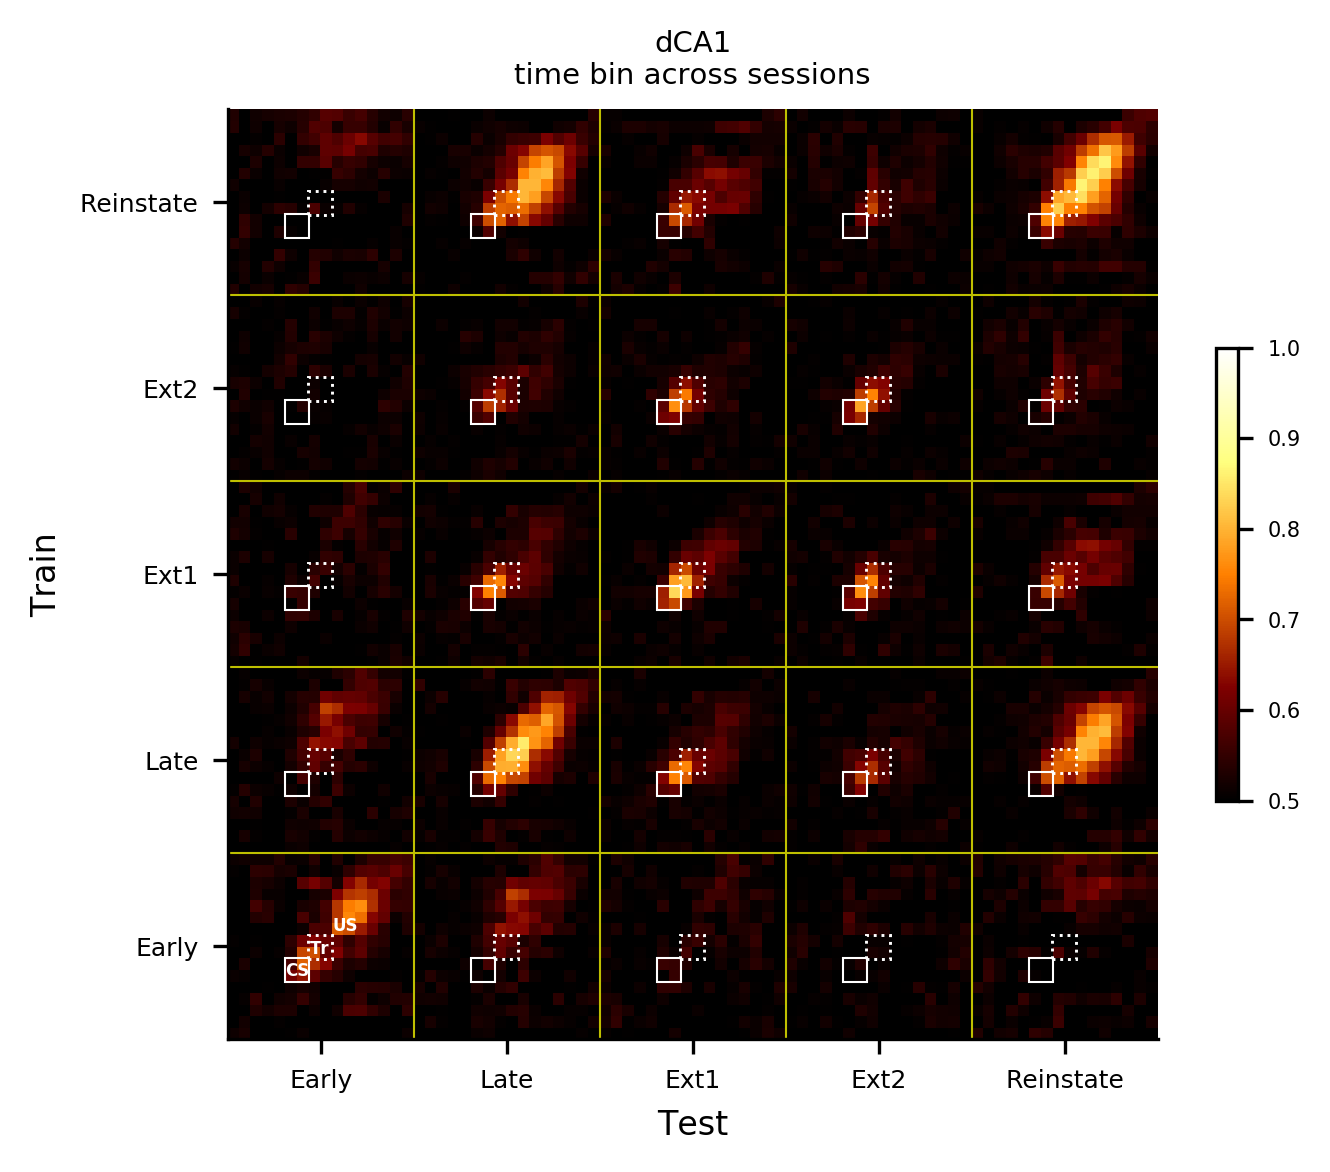

In [74]:
fig,ax = pl.subplots(1,figsize=(5,5))
im = ax.pcolormesh(mega_distinct_forward_means_all,vmin=0.5, vmax=1,cmap='afmhot')
pl.axis('image')
ticks = [8,24,40,56,72]
ax.set_xticks(ticks)
#ax.set_xticks((6,22,38,54,70),minor=True)
ax.set_yticks(ticks)
#ax.set_yticks((6,22,38,54,70),minor=True)
#ax.set_ylim(0,85)
#ax.set_xlim(0,85)
ax.set_xticklabels(['Early','Late','Ext1','Ext2','Reinstate'],fontsize=6)
ax.set_yticklabels(['Early','Late','Ext1','Ext2','Reinstate'],fontsize=6)
ax.set_ylabel('Train', fontsize=8)
ax.set_xlabel('Test', fontsize=8)
pl.hlines([16,32,48,64],-0.5,80,color='y')
pl.vlines([16,32,48,64],-0.5,80,color='y')
##pl.vlines(2,-0.5,2,color='pink')
##pl.hlines(2,-0.5,2,color='pink')
pl.title('dCA1\ntime bin across sessions')
#pl.text(2,2,"CS",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')
#pl.text(3,3,"Tr",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')
#pl.text(4,4,"US",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')

import matplotlib.patches as patches
# Create a Rectangle patch
for i in range(5):
    CS1 = patches.Rectangle((i*16+4.9,4.9),2.1,2.1,linewidth=.5,edgecolor='w',facecolor='none')
    CS2 = patches.Rectangle((i*16+4.9,1*16+4.9),2.1,2.1,linewidth=.5,edgecolor='w',facecolor='none')
    CS3 = patches.Rectangle((i*16+4.9,2*16+4.9),2.1,2.1,linewidth=.5,edgecolor='w',facecolor='none')
    CS4 = patches.Rectangle((i*16+4.9,3*16+4.9),2.1,2.1,linewidth=.5,edgecolor='w',facecolor='none')
    CS5 = patches.Rectangle((i*16+4.9,4*16+4.9),2.1,2.1,linewidth=.5,edgecolor='w',facecolor='none')
    Tr1 = patches.Rectangle((i*16+6.9,6.9),2.1,2.1,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr2 = patches.Rectangle((i*16+6.9,1*16+6.9),2.1,2.1,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr3 = patches.Rectangle((i*16+6.9,2*16+6.9),2.1,2.1,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr4 = patches.Rectangle((i*16+6.9,3*16+6.9),2.1,2.1,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr5 = patches.Rectangle((i*16+6.9,4*16+6.9),2.1,2.1,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
# Add the patch to the Axes
    ax.add_patch(CS1)
    ax.add_patch(CS2)
    ax.add_patch(CS3)
    ax.add_patch(CS4)
    ax.add_patch(CS5)
    ax.add_patch(Tr1)
    ax.add_patch(Tr2)
    ax.add_patch(Tr3)
    ax.add_patch(Tr4)
    ax.add_patch(Tr5)

pl.text(4.9,5.45,"CS",fontsize=4, color='w',weight='bold')
pl.text(7.1,7.35,"Tr",fontsize=4, color='w',weight='bold')
pl.text(9,9.35,"US",fontsize=4, color='w',weight='bold')

#cax = fig.add_axes([.85, 0.86, 0.05, 0.05])
fig.colorbar(im,shrink=0.4)

fig.savefig('../final-ish figures/%s_MEGA_MATRIX_forward.pdf'%NOTEBOOK_NAME)

In [31]:
for t in range (16):
    exec('distinct_means%s = {}'%t)
    
for i in range(0,len(AC),2):
    for t in range (16):
        exec("distinct_means%s['%s_%s_%s'] = []"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],AC[i+1].split('_')[-1]))
        for c in range (16):
            #print t, eval("distinct_means%s['%s_%s_%s']"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],AC[i+1].split('_')[-1]))
            eval("distinct_means%s['%s_%s_%s']"%(t,AC[i].split('_')[0],AC[i].split('_')[-1],AC[i+1].split('_')[-1])).insert(c,(eval('scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s'%(AC[i].split('_')[0],
                            AC[i].split('_')[-1],t,AC[i+1].split('_')[0],AC[i+1].split('_')[-1],c)).mean(1)).mean())

for comp in all_comparisons:
    for t in range (16):
        exec("distinct_means%s['%s_%s_%s'] = []"%(t,comp.split('_')[0],comp.split('_')[-1],comp.split('_')[-1]))
        for c in range (16):
            #print t, eval("distinct_means%s['%s_%s_%s']"%(t,comp.split('_')[0],comp.split('_')[-1],comp.split('_')[-1]))
            eval("distinct_means%s['%s_%s_%s']"%(t,comp.split('_')[0],comp.split('_')[-1],comp.split('_')[-1])).insert(c,(eval('scores_distinct_%s_%s_tb%s_VS_%s_%s_tb%s'%(comp.split('_')[0],
                            comp.split('_')[-1],t,comp.split('_')[0],comp.split('_')[-1],c)).mean(1)).mean())

In [32]:
distinct_means={}
for i in distinct_means0:
    distinct_means[i]=[]
    for r in range(len(distinct_means0[i])):
        distinct_means[i].append(eval("distinct_means%s"%r)[i])
    np.array([distinct_means[i]])

NameError: name 'testy' is not defined

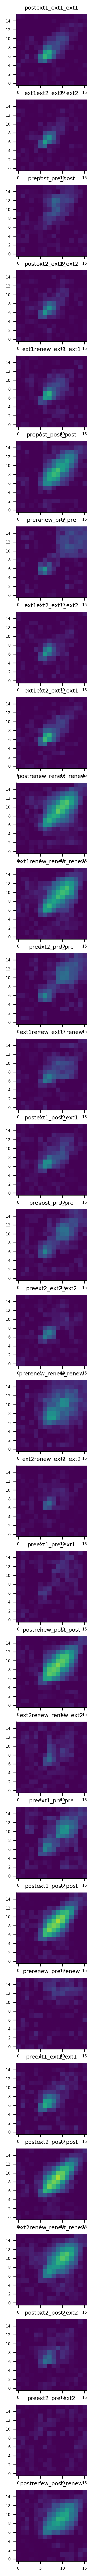

In [33]:
fig, ax = pl.subplots(len(distinct_means), 1, figsize=(3,60))#, sharex=True, sharey=True)
vmin=0.5
vmax=1
for i,t in zip(range(len(distinct_means)),distinct_means):
    im = ax[i].imshow(distinct_means[t],origin='lower', interpolation='nearest',vmin=vmin, vmax=vmax)
    ax[i].set_title(t)

for x in range(len(testy)):
    ax[x].set_xticks(range(16))
    ax[x].set_yticks(range(16))
    #ax[x].set_ylim(2.5, 14.5)
    #ax[x].set_xlim(2.5,14.5)
    ax[x].set_xticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','0\nCS','1\nCS','2\nTr','3\nTr','4\nRw','5', '6','7','8','9','10'],fontsize=4)
    ax[x].set_yticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','CS 0','CS 1','Tr 2','Tr 3','Rw 4','5', '6','7','8','9','10'],fontsize=4)
    ax[x].set_ylabel('Time(s) from CS onset', fontsize=5)
    ax[x].set_xlabel('Time(s) from CS onset', fontsize=5)

# axs[0].set_xticklabels(np.arange(len(np.unique(labels)))+1)
# axs[0].set_yticklabels(np.arange(len(np.unique(labels)))+1)


cax = fig.add_axes([.85, 0.86, 0.05, 0.05])
fig.colorbar(im, cax=cax)
fig.tight_layout(pad=2.5)
#fig.savefig('../img/%s.jpg'%NOTEBOOK_NAME)

In [36]:
for col in range(1,6):
    exec("mega_col%s = [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]"%col)
    for x in range(len(distinct_means0['ext1ext2_ext1_ext1'])):
        exec("mega_col%s[%s] = []"%(col,x))
        for c in range(len(mega_list_col1)):
            for comp in eval("mega_list_col%s[%s]"%((c+1),col-1)):
                for y in range(len(distinct_means0['ext1ext2_ext1_ext1'])):
                    print col,x,c,comp,y,'ok',
                    eval("mega_col%s[x]"%col).insert((16*c)+y, eval("distinct_means%s[comp][y]"%x))

1 0 0 preext1_pre_pre 0 ok 1 0 0 preext1_pre_pre 1 ok 1 0 0 preext1_pre_pre 2 ok 1 0 0 preext1_pre_pre 3 ok 1 0 0 preext1_pre_pre 4 ok 1 0 0 preext1_pre_pre 5 ok 1 0 0 preext1_pre_pre 6 ok 1 0 0 preext1_pre_pre 7 ok 1 0 0 preext1_pre_pre 8 ok 1 0 0 preext1_pre_pre 9 ok 1 0 0 preext1_pre_pre 10 ok 1 0 0 preext1_pre_pre 11 ok 1 0 0 preext1_pre_pre 12 ok 1 0 0 preext1_pre_pre 13 ok 1 0 0 preext1_pre_pre 14 ok 1 0 0 preext1_pre_pre 15 ok 1 0 1 prepost_pre_post 0 ok 1 0 1 prepost_pre_post 1 ok 1 0 1 prepost_pre_post 2 ok 1 0 1 prepost_pre_post 3 ok 1 0 1 prepost_pre_post 4 ok 1 0 1 prepost_pre_post 5 ok 1 0 1 prepost_pre_post 6 ok 1 0 1 prepost_pre_post 7 ok 1 0 1 prepost_pre_post 8 ok 1 0 1 prepost_pre_post 9 ok 1 0 1 prepost_pre_post 10 ok 1 0 1 prepost_pre_post 11 ok 1 0 1 prepost_pre_post 12 ok 1 0 1 prepost_pre_post 13 ok 1 0 1 prepost_pre_post 14 ok 1 0 1 prepost_pre_post 15 ok 1 0 2 preext1_pre_ext1 0 ok 1 0 2 preext1_pre_ext1 1 ok 1 0 2 preext1_pre_ext1 2 ok 1 0 2 preext1_pre_ext1 3

In [37]:
mega_distinct_means_all = mega_col1+mega_col2+mega_col3+mega_col4+mega_col5

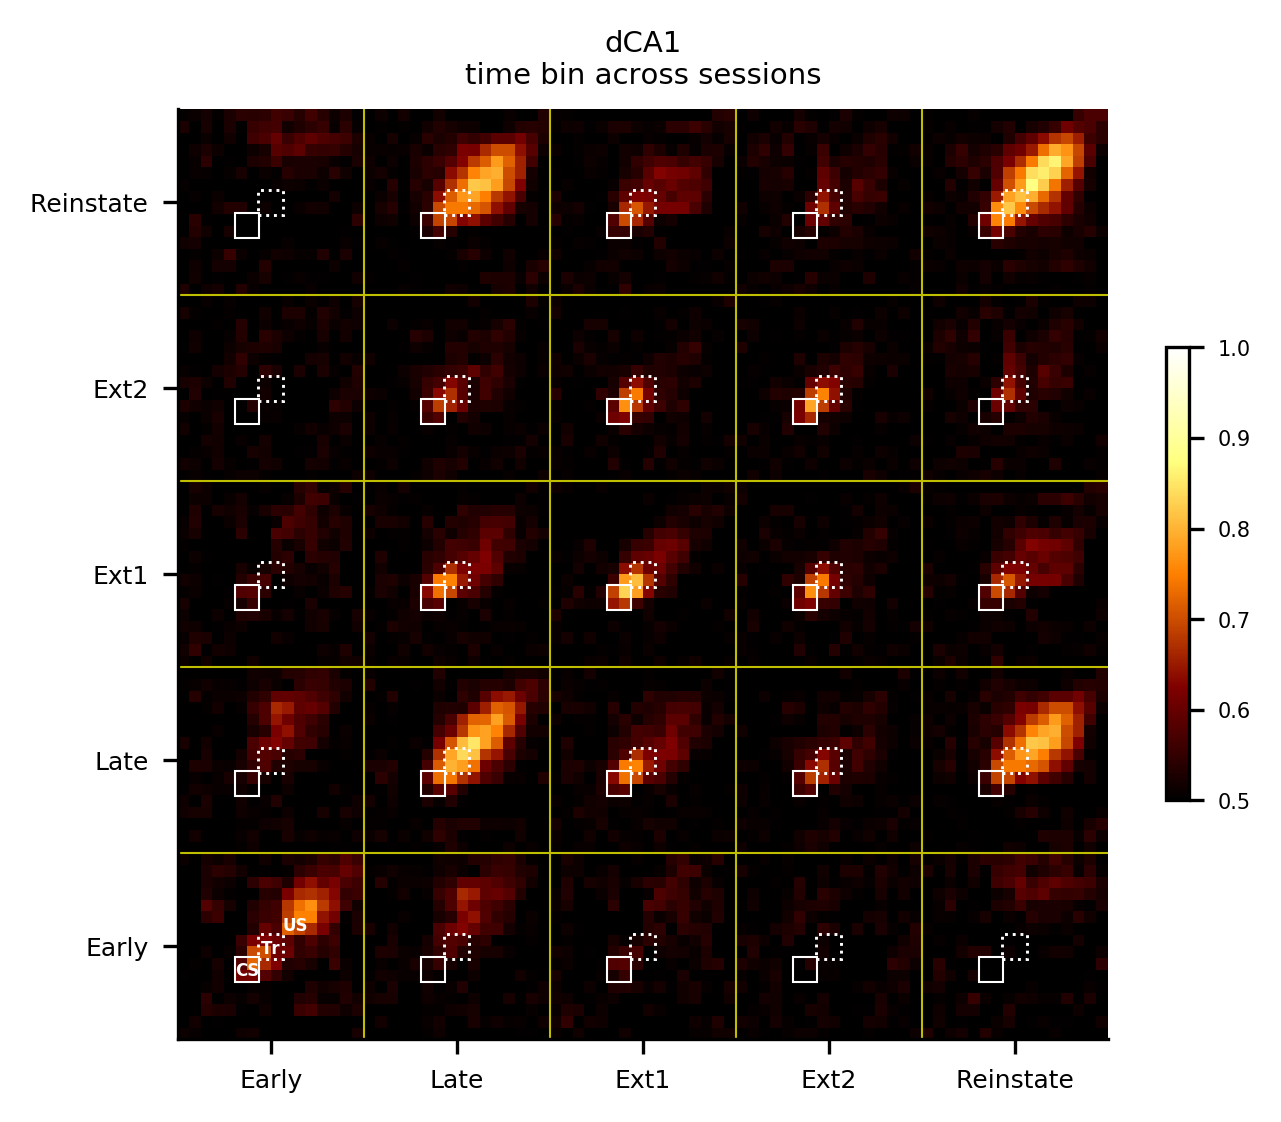

In [75]:
fig,ax = pl.subplots(1,figsize=(5,5))
im = ax.pcolormesh(mega_distinct_means_all,vmin=0.5, vmax=1,cmap='afmhot')
pl.axis('image')
ticks = [8,24,40,56,72]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(['Early','Late','Ext1','Ext2','Reinstate'],fontsize=6)
ax.set_yticklabels(['Early','Late','Ext1','Ext2','Reinstate'],fontsize=6)
pl.hlines([16,32,48,64],-0.5,80,color='y')
pl.vlines([16,32,48,64],-0.5,80,color='y')
pl.title('dCA1\ntime bin across sessions')

import matplotlib.patches as patches
# Create a Rectangle patch
for i in range(5):
    CS1 = patches.Rectangle((i*16+4.9,4.9),2.1,2.1,linewidth=.5,edgecolor='w',facecolor='none')
    CS2 = patches.Rectangle((i*16+4.9,1*16+4.9),2.1,2.1,linewidth=.5,edgecolor='w',facecolor='none')
    CS3 = patches.Rectangle((i*16+4.9,2*16+4.9),2.1,2.1,linewidth=.5,edgecolor='w',facecolor='none')
    CS4 = patches.Rectangle((i*16+4.9,3*16+4.9),2.1,2.1,linewidth=.5,edgecolor='w',facecolor='none')
    CS5 = patches.Rectangle((i*16+4.9,4*16+4.9),2.1,2.1,linewidth=.5,edgecolor='w',facecolor='none')
    Tr1 = patches.Rectangle((i*16+6.9,6.9),2.1,2.1,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr2 = patches.Rectangle((i*16+6.9,1*16+6.9),2.1,2.1,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr3 = patches.Rectangle((i*16+6.9,2*16+6.9),2.1,2.1,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr4 = patches.Rectangle((i*16+6.9,3*16+6.9),2.1,2.1,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
    Tr5 = patches.Rectangle((i*16+6.9,4*16+6.9),2.1,2.1,linewidth=.7,edgecolor='w',facecolor='none',linestyle=':')
# Add the patch to the Axes
    ax.add_patch(CS1)
    ax.add_patch(CS2)
    ax.add_patch(CS3)
    ax.add_patch(CS4)
    ax.add_patch(CS5)
    ax.add_patch(Tr1)
    ax.add_patch(Tr2)
    ax.add_patch(Tr3)
    ax.add_patch(Tr4)
    ax.add_patch(Tr5)

pl.text(4.9,5.45,"CS",fontsize=4, color='w',weight='bold')
pl.text(7.1,7.35,"Tr",fontsize=4, color='w',weight='bold')
pl.text(9,9.35,"US",fontsize=4, color='w',weight='bold')

#cax = fig.add_axes([.85, 0.86, 0.05, 0.05])
fig.colorbar(im,shrink=0.4)

fig.savefig('../img/%s_MEGA_MATRIX.pdf'%NOTEBOOK_NAME)

In [39]:
print 'pre vs post: ', 
print distinct_means10['prepost_pre_post'][10]
#print 'pre vs ext1: ',
#print distinct_means10['preext1_pre_ext1'][10]
#print 'pre vs ext2: ', 
#print distinct_means10['preext2_pre_ext2'][10]
print 'pre vs renew: ', 
print distinct_means10['prerenew_pre_renew'][10]
#print 'post vs ext1: ', 
#print distinct_means10['postext1_post_ext1'][10]
#print 'post vs ext2: ', 
#print distinct_means10['postext2_post_ext2'][10]
print 'post vs renew: ', 
print distinct_means10['postrenew_post_renew'][10]

pre vs post:  0.579333333333
pre vs renew:  0.5255
post vs renew:  0.78675


In [40]:
#organize matrix, but for p-values
for col in range(1,6):
    exec("mega_pval_col%s = [[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]]"%col)
    for x in range(len(distinct0_wilcox['ext1ext2_ext1_ext1'])):
        exec("mega_pval_col%s[%s] = []"%(col,x))
        for c in range(len(mega_list_col1)):
            for comp in eval("mega_list_col%s[%s]"%((c+1),col-1)):
                for y in range(len(distinct0_wilcox['ext1ext2_ext1_ext1'])):
                    print col,x,c,comp,y,'ok',
                    eval("mega_pval_col%s[x]"%col).insert((16*c)+y, eval("distinct%s_wilcox[comp][y]"%x))

1 0 0 preext1_pre_pre 0 ok 1 0 0 preext1_pre_pre 1 ok 1 0 0 preext1_pre_pre 2 ok 1 0 0 preext1_pre_pre 3 ok 1 0 0 preext1_pre_pre 4 ok 1 0 0 preext1_pre_pre 5 ok 1 0 0 preext1_pre_pre 6 ok 1 0 0 preext1_pre_pre 7 ok 1 0 0 preext1_pre_pre 8 ok 1 0 0 preext1_pre_pre 9 ok 1 0 0 preext1_pre_pre 10 ok 1 0 0 preext1_pre_pre 11 ok 1 0 0 preext1_pre_pre 12 ok 1 0 0 preext1_pre_pre 13 ok 1 0 0 preext1_pre_pre 14 ok 1 0 0 preext1_pre_pre 15 ok 1 0 1 prepost_pre_post 0 ok 1 0 1 prepost_pre_post 1 ok 1 0 1 prepost_pre_post 2 ok 1 0 1 prepost_pre_post 3 ok 1 0 1 prepost_pre_post 4 ok 1 0 1 prepost_pre_post 5 ok 1 0 1 prepost_pre_post 6 ok 1 0 1 prepost_pre_post 7 ok 1 0 1 prepost_pre_post 8 ok 1 0 1 prepost_pre_post 9 ok 1 0 1 prepost_pre_post 10 ok 1 0 1 prepost_pre_post 11 ok 1 0 1 prepost_pre_post 12 ok 1 0 1 prepost_pre_post 13 ok 1 0 1 prepost_pre_post 14 ok 1 0 1 prepost_pre_post 15 ok 1 0 2 preext1_pre_ext1 0 ok 1 0 2 preext1_pre_ext1 1 ok 1 0 2 preext1_pre_ext1 2 ok 1 0 2 preext1_pre_ext1 3

In [41]:
mega_distinct_pval_all = mega_pval_col1+mega_pval_col2+mega_pval_col3+mega_pval_col4+mega_pval_col5

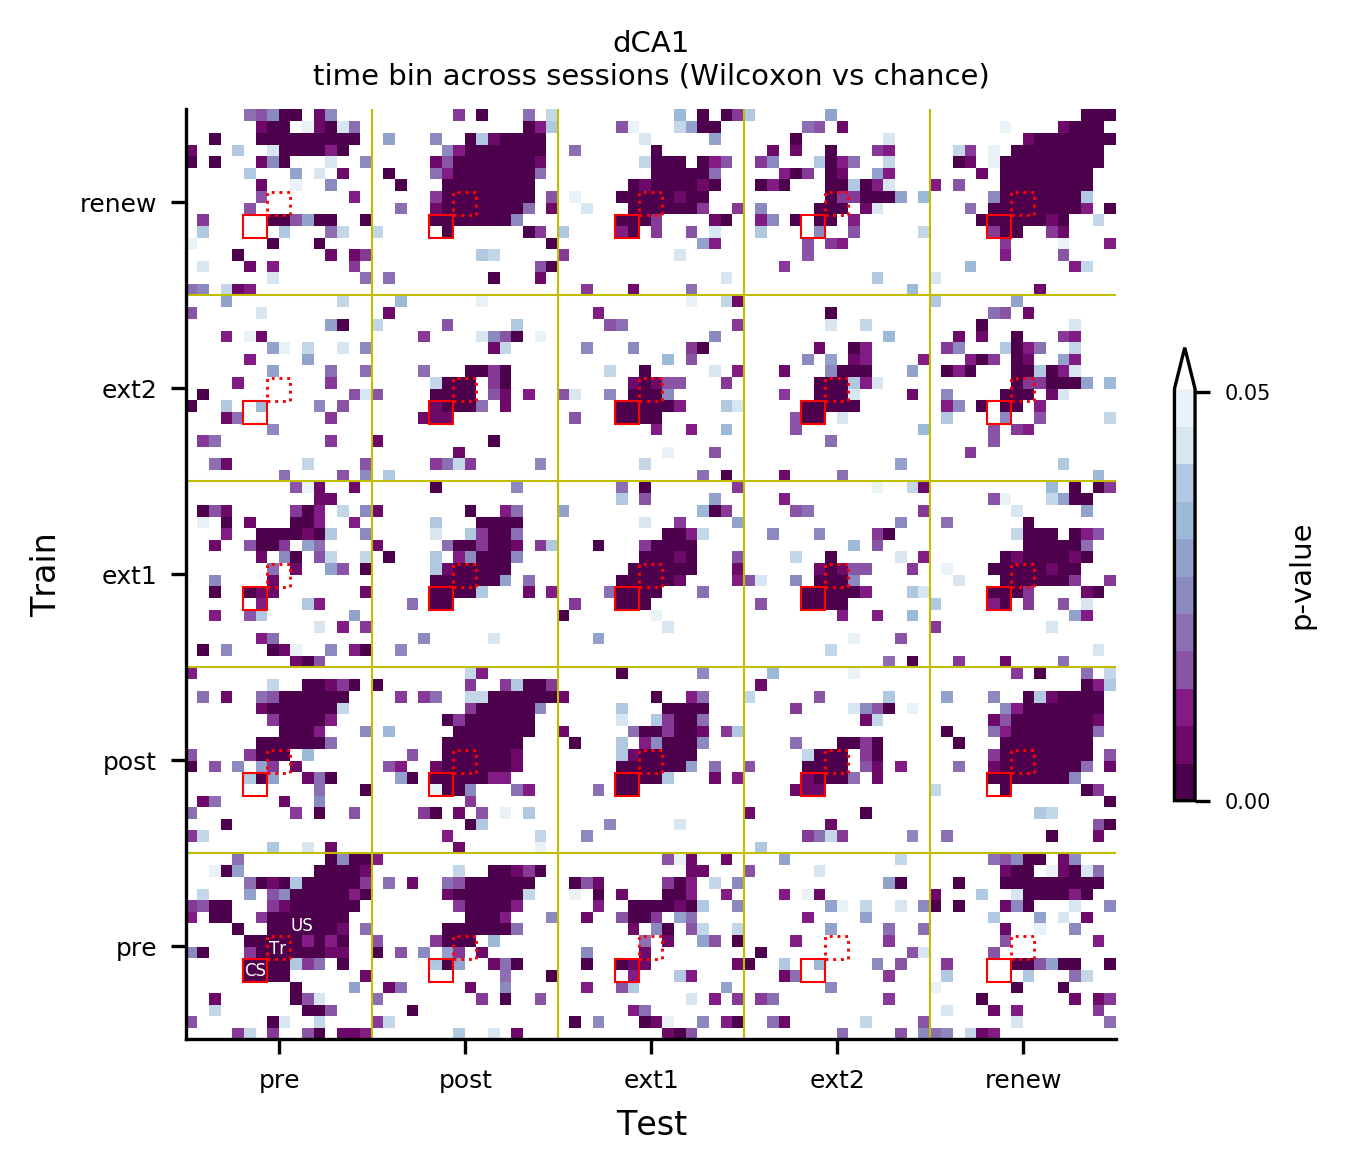

In [45]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#make unique colormap for emphasizing significant p-values
sigs = cm.get_cmap('BuPu', 53)
white = np.array([1, 1, 1, 1])
newcolors = np.vstack((sigs(np.linspace(1, 0, 14)),
                       sigs(np.linspace(0, 1, 242))))
#pink = np.array([.96, .09, .6, 1])
newcolors[13:, :] = white
newcmp = ListedColormap(newcolors)

fig,ax = pl.subplots(1,figsize=(5,5))
im = ax.pcolormesh(mega_distinct_pval_all,vmin=0, vmax=1,cmap=newcmp)
pl.axis('image')
ticks = [8,24,40,56,72]
ax.set_xticks(ticks)
#ax.set_xticks((6,22,38,54,70),minor=True)
ax.set_yticks(ticks)
#ax.set_yticks((6,22,38,54,70),minor=True)
#ax.set_ylim(0,85)
#ax.set_xlim(0,85)
ax.set_xticklabels(['pre','post','ext1','ext2','renew'],fontsize=6)
ax.set_yticklabels(['pre','post','ext1','ext2','renew'],fontsize=6)
ax.set_ylabel('Train', fontsize=8)
ax.set_xlabel('Test', fontsize=8)
pl.hlines([16,32,48,64],-0.5,80,color='y')
pl.vlines([16,32,48,64],-0.5,80,color='y')
##pl.vlines(2,-0.5,2,color='pink')
##pl.hlines(2,-0.5,2,color='pink')
pl.title('dCA1\ntime bin across sessions (Wilcoxon vs chance)')
#pl.text(2,2,"CS",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')
#pl.text(3,3,"Tr",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')
#pl.text(4,4,"US",fontsize=2,color='white',horizontalalignment='center',verticalalignment='center')

import matplotlib.patches as patches
# Create a Rectangle patch
for i in range(5):
    CS1 = patches.Rectangle((i*16+4.9,4.9),2,2,linewidth=.5,edgecolor='r',facecolor='none')
    CS2 = patches.Rectangle((i*16+4.9,1*16+4.9),2,2,linewidth=.5,edgecolor='r',facecolor='none')
    CS3 = patches.Rectangle((i*16+4.9,2*16+4.9),2,2,linewidth=.5,edgecolor='r',facecolor='none')
    CS4 = patches.Rectangle((i*16+4.9,3*16+4.9),2,2,linewidth=.5,edgecolor='r',facecolor='none')
    CS5 = patches.Rectangle((i*16+4.9,4*16+4.9),2,2,linewidth=.5,edgecolor='r',facecolor='none')
    Tr1 = patches.Rectangle((i*16+6.9,6.9),2,2,linewidth=.7,edgecolor='r',facecolor='none',linestyle=':')
    Tr2 = patches.Rectangle((i*16+6.9,1*16+6.9),2,2,linewidth=.7,edgecolor='r',facecolor='none',linestyle=':')
    Tr3 = patches.Rectangle((i*16+6.9,2*16+6.9),2,2,linewidth=.7,edgecolor='r',facecolor='none',linestyle=':')
    Tr4 = patches.Rectangle((i*16+6.9,3*16+6.9),2,2,linewidth=.7,edgecolor='r',facecolor='none',linestyle=':')
    Tr5 = patches.Rectangle((i*16+6.9,4*16+6.9),2,2,linewidth=.7,edgecolor='r',facecolor='none',linestyle=':')
# Add the patch to the Axes
    ax.add_patch(CS1)
    ax.add_patch(CS2)
    ax.add_patch(CS3)
    ax.add_patch(CS4)
    ax.add_patch(CS5)
    ax.add_patch(Tr1)
    ax.add_patch(Tr2)
    ax.add_patch(Tr3)
    ax.add_patch(Tr4)
    ax.add_patch(Tr5)

pl.text(5,5.45,"CS",fontsize=4, color='w')
pl.text(7.1,7.35,"Tr",fontsize=4, color='w')
pl.text(9,9.35,"US",fontsize=4, color='w')

#cax = fig.add_axes([.85, 0.86, 0.05, 0.05])
fig.colorbar(im,shrink=0.4,ticks=[0,.05,1],label='p-value',boundaries=np.linspace(0,.055,13),extend='max',extendfrac=.1)

fig.savefig('../img/%s_MEGA_MATRIX_pvals.pdf'%NOTEBOOK_NAME)

In [43]:
save_workspace(db)

Could not store variable 'sstats'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'patches'. Skipping...
Could not store variable 'cm'. Skipping...
Could not store variable 'di'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
